[View in Colaboratory](https://colab.research.google.com/github/nurkayevaa/lambda/blob/master/Anel_Dimensionality_Reduction_Sprint_Challenge.ipynb)

# Dimensionality Reduction Sprint Challenge

A powerful method for dimensionality reduction is using Principal Components Analysis (PCA).

Students should be able to complete objectives after this sprint:
* Identify the use case for normalization
* Graph the top two dimensions of a high dimensional dataset with PCA
* Compute the eigenvectors and eigenvalues of a dataset

Lets use the UCI Wine Dataset for this Sprint  Challenge: It is high dimensional, numeric, and clean - an excellent opportunity for PCA.

[UCI Wine Data Set](http://archive.ics.uci.edu/ml/datasets/Wine)

The UCI License forbids redistributing their data. We can link directly to it!

[UCI Wine Data Set Data](http://archive.ics.uci.edu/ml/machine-learning-databases/wine/)

In [2]:
# Download the data to your colab instance!
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data -O wine.data

--2018-05-12 16:41:40--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [text/plain]
Saving to: ‘wine.data’

wine.data           100%[===================>]  10.53K  --.-KB/s    in 0s      

2018-05-12 16:41:40 (275 MB/s) - ‘wine.data’ saved [10782/10782]



In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('wine.data')

# Column names from:
# http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names
columns = ['vinyard','alcohol','malic acid','ash','ash alcalinity','magnesium',
           'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
           'Color intensity','Hue','dilute OD280/OD315', 'Proline']

data.columns = columns

vinyard = data['vinyard']
data = data.drop(['vinyard'],axis=1)
colors = np.array(['red','green','blue'])[np.array([vinyard])-1]

# 1. Identify the use case for normalization

Principal Components Analysis will give us a view into our data that maximizes its variance, potentially improving intuition and learning algorithms. Look at the below `data.std()` output. If we use PCA to project the wine dataset onto the 3 dimensions with the highest variance, which ones will they be? How will this projection differ than simply plotting the three dimensions directly?

In [87]:
#data_hv = data.drop(['vinyard', 'malic acid', 'alcohol', 'ash'],axis=1)

print("Sorted STD's : \n", data.std().sort_values(ascending = False).head(n=3))





Sorted STD's : 
 Proline           314.884046
magnesium          14.174018
ash alcalinity      3.336071
dtype: float64


# 2. Graph the top two dimensions of a high dimensional dataset using PCA

Use PCA with 2 components to plot the top two dimensions of this dataset. Apply the color vector above so that the origin of each sample is visible.

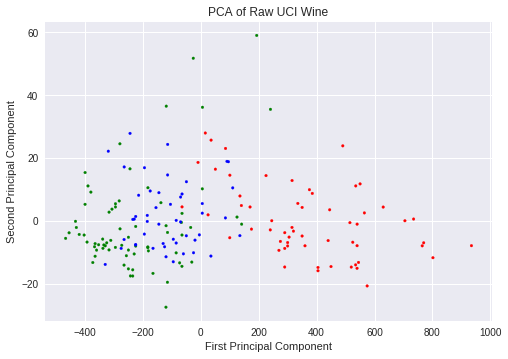

In [77]:
from sklearn.decomposition import PCA

# First, we specify the number of components we want our PCA model to return. 
# In this instance, we're interested in the top 2, so we set n_components = 2.

Model = PCA(n_components=2)

# Next, we need to actually find the principle components. 
# We can do this in two steps, or one step.
# In two steps, we fit the data, then transform it.

Model.fit(data)
data_reduced = Model.transform(data)

# In one step, we use pca's fit_transform method, 
# which is slightly more succinct.

data_reduced = Model.fit_transform(data)

# Obviously, doing both (like I just did) is redundant.
# Feel free to comment out one method or the other to verify that 
# their results are equivalent.

# Now we graph our model. 

x, y = data_reduced.T


plt.scatter(x, y, s=7, c=colors[0])


plt.title('PCA of Raw UCI Wine')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component');

# 3. Graph the top two dimensions of a normalized high dimensional dataset using PCA

Use a `normalization` from `scikit.preprocessing` to improve the results of the PCA.

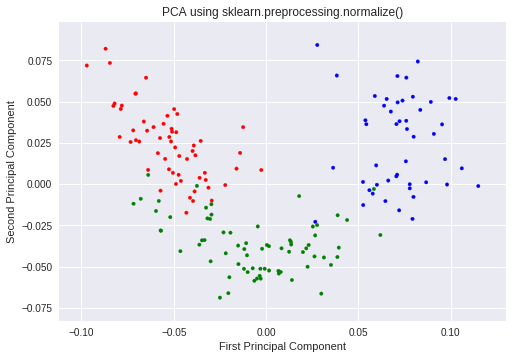

In [82]:
import sklearn.preprocessing as preprocessing

model_norm = PCA(n_components=2)

data_normalized = preprocessing.normalize(data, axis= 0)

model_norm.fit(data_normalized)

data_n = model_norm.transform(data_normalized)


plt.scatter(*data_n.T, s=12, c=colors[0])
plt.title('PCA using sklearn.preprocessing.normalize()')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component');

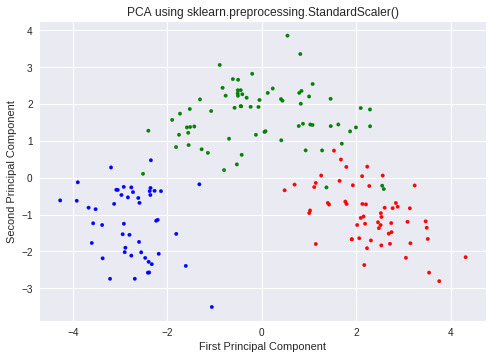

In [81]:
model_stand = PCA(n_components=2)

data_standardized = preprocessing.StandardScaler().fit_transform(data)

model_stand.fit(data_standardized)

data_s = model_stand.transform(data_standardized)


plt.scatter(*data_s.T, s=12, c=colors[0])
plt.title('PCA using sklearn.preprocessing.StandardScaler()')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component');

# 4. Compute the eigenvectors of a dataset

What are the top-two eigenvectors of the above un-normalized dataset?

In [89]:
evec = Model.components_

print('First eigenvector: {}\n\nSecond eigenvector: {}'.format(evec[0], evec[1]))

First eigenvector: [ 1.64640308e-03 -6.73503229e-04  1.94877262e-04 -4.62714440e-03
  1.74715429e-02  9.86349949e-04  1.55753482e-03 -1.22303077e-04
  5.91285826e-04  2.33005971e-03  1.70867398e-04  6.85045272e-04
  9.99830206e-01]

Second eigenvector: [ 7.16631916e-04  2.50017789e-03  4.67090151e-03  2.87250643e-02
  9.99280105e-01  7.48473242e-04 -4.49114755e-04 -1.34284344e-03
  4.71110804e-03  1.54838007e-02 -7.97923308e-04 -4.34277343e-03
 -1.73653604e-02]


# 5. Compute the eigenvalues of a dataset

What are the top-two eigenvalues of the above un-normalized dataset?

In [86]:
# eval = the top two eigenvalues of the UCI Wine dataset, un-normalized

eval = Model.explained_variance_

print('First eigenvalue: {}\n\nSecond eigenvalue: {}'.format(eval[0],eval[1]))

First eigenvalue: 99185.58985563336

Second eigenvalue: 170.86188421366896
